# **Homework 2 - eCommerce analytics**

### QUESTIONS THAT TAKE A LOOOOT OF TIME

- RATE OF COMPLETE FUNNELS
- TIME PASSES ON AVERAGE BETWEEN CART AND PURCHASE
- RQ4_2

## Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import datetime
import operator
import re
import statistics

import functions

## Importing the data

It is important to notice that the plots shown are based on 2.000.000 rows.

In [2]:
data1 = pd.read_csv('/Users/clementerecine/Desktop/ADM/homework/HW2/dataset/2019-Oct.csv',header='infer',
                   nrows = 1000000)

data2 = pd.read_csv('/Users/clementerecine/Desktop/ADM/homework/HW2/dataset/2019-Nov.csv',header='infer',
                   nrows = 1000000)

In order to work with a single dataset we concatenated the two original datasets indexing them conseguently.

In [3]:
data2.index = range (data1.shape[0], data1.shape[0] + data2.shape[0])
ds = pd.concat([data1, data2])

Let us give an initial glance on how the dataset is structured

In [4]:
ds.head(8)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6


## Project Goal

Our team has been hired to answer some foundamental research questions (from now on RQ) that will discover meaningful patterns in data.

# **[RQ1]** A marketing funnel describes your customer’s journey with your e-commerce.

It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. 

Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase.

## Which is the rate of complete funnels?

In [62]:
def RQ1_0(ds):
    v= ds[ds.event_type=="view"].groupby([ds.user_id,ds.product_id])
    c= ds[ds.event_type=="cart"].groupby([ds.user_id,ds.product_id])
    p= ds[ds.event_type=="purchase"].groupby([ds.user_id,ds.product_id])

    TOT=0
    TOT_CFUN = 0
    l=[]
    for index,row in p:
        u,pr=index[0],index[1]

        if u not in l:
            for index_,row in c:
                if (index_[0],index_[1])==(u,pr):
                    for index__,row in v:
                        if (index__[0],index__[1])==(u,pr):
                            TOT_CFUN = TOT_CFUN + 1
                            TOT+=1
                            l.append(u)
                        else:
                            TOT+=1
                else:
                    TOT+=1
    return TOT,TOT_CFUN

In [ ]:
tot,tot_cf=RQ1_0(ds)
print('The rate of complete funnels is {}%.'.format((tot_cf/tot)*100))

## What’s the operation users repeat more on average within a session?

In order to answer this question, we first decided to compute the average operations completeted during a single user session and from that find the maxima value.

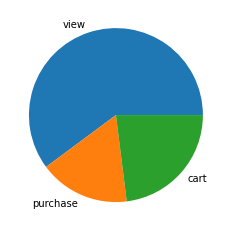

In [5]:
_=functions.RQ1_1a(ds)

Based on this comparison we can clearly state that the view operation is by far the most repeated operation.

## Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

The starting point to this question is the same as the question before: computing the averages. 

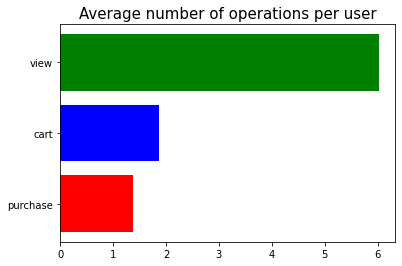

In [75]:
_=functions.RQ1_1b(ds)

It is straightforward to see how the event view is the one users perform the most on our site.

## How many times, on average, a user views a product before adding it to the cart?

The computation of this answer required to filter the dataset only for rows associated to the event_type view or cart.

In [6]:
ds_group = ds[(ds.event_type == 'view') | (ds.event_type == 'cart')].groupby([ds.product_id, ds.user_id]).event_type
res=functions.RQ1_2(ds_group)
print('A user on average views a product before adding it to the cart', "%.2f" %res , "times")

A user on average views a product before adding it to the cart 1.88 times


Given the result, we can almost certainly say that a user always views a product before adding it to the cart.

## What’s the probability that products added once to the cart are effectively bought?

In order to answer this question we count all the event type 'cart' (these will be our total cases) and then we will count all the event type 'purchase' preceded by 'cart' (these will be our favorable cases).

Finding this latter quantity will be a challenge and we will need to make the following remarks:

* Since in our dataset there is no distinction between the event type '1-click purchase' and 'purchase from cart', we need to make the assumption that: *if there is a product in the cart, the user will always use 'purchase from cart' to buy that particular product* .


* Our estimation of this probability is an **upper bound estimation** in the sense that we count more favorable cases than they really are, because we weren't able to find a way (without making the code enormously expensive) to discard all the cases in which the event 'purchase' precedes the event 'cart'. To illustrate this point more clearly with an example, for our code the two actions: [purchase, purchase, cart, cart] and [cart, cart, purchase, purchase]  (made by a particular user on a particular object in chronological order) are the same, they both count as 2 favorable cases. 

In [7]:
# We count the total cases 
TOT_CASES = ds[(ds.event_type == 'cart')].event_type.count().sum()

# We count the favorable cases 
ds_group = ds[(ds.event_type == 'cart') | (ds.event_type == 'purchase')].groupby([ds.product_id, ds.user_id]).event_type

PROB=(functions.RQ1_3(ds_group))/TOT_CASES
print("%.2f" % PROB)

0.40


COMMENT ON THE RESULT

## What’s the average time an item stays in the cart before being removed?

There is an ambiguity in this question on what we mean by **removing an item from the cart**.

The ambiguity is due to the fact that an an item can be removed from the cart either by purchasing the item or applying the event 'remove_from_cart'.

We would be inclined to use the latter interpretation, but since in the dataset of October and November 2019 there is no 'remove_from_cart' event type (as we can see from the graph of 'average number of operations per user') we will use the first interpretation. !!! ADD COMMENT GIACOMO !!!

Furthermore in order to aswer the question we will work with dates, for this reason we change the data stored in event_time from a string to a datetime object.

In [9]:
ds['event_time'] = pd.to_datetime(ds.event_time)

In the case there are multiple "cart" events followed by "purchase" events, there is uncertainty on which product has been purchased from the cart.
For example if we have something like [cart , cart , purchase], which one of the product has been purchased? Is the first one added to the cart or the second one?

So we are strongly inclined to make the following assumption:

    When a user buys a product she/he always buys the first product added to the cart

Given this, in the case we have multiple addition to the cart we will always count the time difference starting from the first product added to the cart.  


In [10]:
ds_group = ds[(ds.event_type == 'cart') | (ds.event_type == 'purchase')].groupby([ds.product_id, ds.user_id])
TOT_DATES,TOT_CASES=functions.RQ1_4(ds_group)
res_=TOT_DATES/TOT_CASES

minutes=res_.seconds//60
seconds=res_.seconds%60

print('The average time an item stays in the cart before being removed is {} minutes and {} seconds.'\
      .format(minutes,seconds))

The average time an item stays in the cart before being removed is 38 minutes and 5 seconds.


## How much time passes on average between the first view time and a purchase/addition to cart?

In our interpretation there are two possible competing answers to this question: 

* We could calculate the average time between the first view time and a purchase or addition to cart whichever comes first. 


* We could calculate two averages: one given by the average time between the first view and a '1-click purchase' (in the sense that the product was bought without being added to the cart first) and the other one given by the average time between the first view and the addition to cart. 

We chose to give the ***first answer***.

As before to answer this question we need first to change the type of the event_time from string to datetime

In [ ]:
ds['event_time'] = pd.to_datetime(ds.event_time)

It is important to notice that in the question above we decided to ignore the outliers (i.e. the cases in which the *purchase event* comes before the *cart event*), rather in this question we decided to count all the possible cases at the expanse of readability and computational cost of the code.

In [30]:
ds_group = ds[(ds.event_type == 'cart') | (ds.event_type == 'purchase') | (ds.event_type == 'view')]\
.groupby([ds.product_id, ds.user_id])

TOT_DATES,TOT_CASES=functions.RQ1_5(ds_group)
res__=(TOT_DATES / TOT_CASES)

minutes=res_.seconds//60
seconds=res_.seconds%60

print('On average the time that passes between the first view time and a purchase/addition to cart is {} minutes and {} seconds.'\
      .format(minutes,seconds))

KeyboardInterrupt: 

##### COMMENT THE ReSULT which again is not exactly clear !!!

# **[RQ2]** What are the categories of the most trending products overall? 

## For *each month* visualize this information through a plot showing the number of sold products per category.

From now on we will consider as a *primary category* the first name used in category_code (the one we fin before the first dot), while after the first dot we will find the *subcategories* .

For example if we have *appliances.environment.vacuum* we will say that *appliances.* is a category and that *appliances.environment* is the subcategory (we would say that *appliances.environment.vacuum* is a subsubcategory but for the sake of the question we won't go into the details for subsubcategories) 

In [11]:
#creating 2 sub-dataframe which ploted the mounth we want given in parameter
octo=ds[(ds.event_type=='purchase') & (ds.event_time.dt.month==10)].groupby(ds.category_code)
nov=ds[(ds.event_type=='purchase') & (ds.event_time.dt.month==11)].groupby(ds.category_code)

# Here we call the function RQ2 which will give us: 
# df : a dataframe which (ASK YOURI)
# maxi : the number of sales per category 
# cat : the particular category in which we have counted the number of sales

df,cat,maxi=functions.RQ2_1(nov)
df_,cat_,maxi_=functions.RQ2_1(octo)

The category of the most trending products overall during October is electronics. and the number of sales is 9890.
The category of the most trending products overall during November is electronics. and the number of sales is 10146.


<AxesSubplot:title={'center':'Number of sales during November order by primary categories'}>

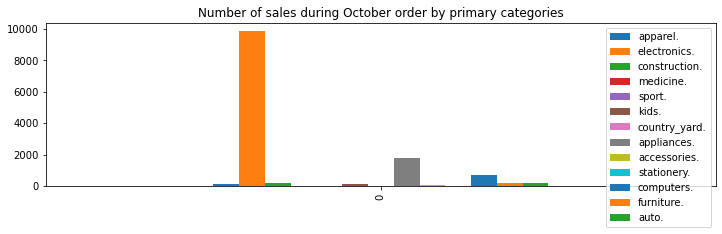

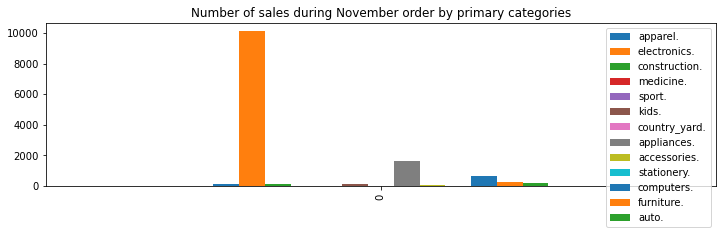

In [12]:
print("The category of the most trending products overall during October is {} and the number of sales is {}.".format(cat_,maxi_))
df_.plot.bar(figsize=(12,3), title='Number of sales during October order by primary categories')

print("The category of the most trending products overall during November is {} and the number of sales is {}.".format(cat,maxi))
df.plot.bar(figsize=(12,3), title='Number of sales during November order by primary categories')

We can clearly see from the two plots that in both the analysed months **electronics** composes the majority of the sales of the e-commerce store. The category with the second highest sold products in both months is appliances.

## Plot the most visited subcategories

We decided to plot the most visited subcategories for each primary category.

The difficoulty to read tidely the result is due to the decision to plot for each primary category
the total number of views per sub-category. This we found extremely interesting because it revealed clearly the preferences of our costumers.

The important information in the output can be found in the bold sentences which reveal for each primary category the most visited sub-category.

{'apparel.belt': 77, 'apparel.costume': 4506, 'apparel.dress': 1632, 'apparel.jacket': 18, 'apparel.jeans': 1340, 'apparel.jumper': 365, 'apparel.scarf': 107, 'apparel.shirt': 599, 'apparel.shoes': 36678, 'apparel.shoes.': 19900, 'apparel.shorts': 40, 'apparel.skirt': 17, 'apparel.sock': 102, 'apparel.trousers': 648, 'apparel.tshirt': 794, 'apparel.underwear': 1381}
AxesSubplot(0.125,0.125;0.775x0.755)
The sub category of apparel  which has the maximum views is apparel shoes with 36678 views
{'electronics.audio.': 71004, 'electronics.camera.': 2160, 'electronics.clocks': 63314, 'electronics.smartphone': 508420, 'electronics.tablet': 14497, 'electronics.telephone': 11912, 'electronics.video.': 50309}
AxesSubplot(0.125,0.125;0.775x0.755)
The sub category of electronics  which has the maximum views is electronics smartphone with 508420 views
{'construction.components.': 1153, 'construction.tools.': 32546}
AxesSubplot(0.125,0.125;0.775x0.755)
The sub category of construction  which has the

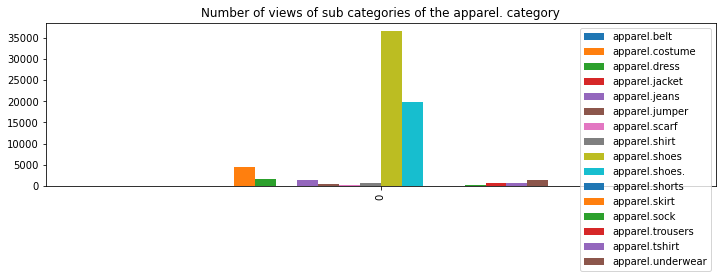

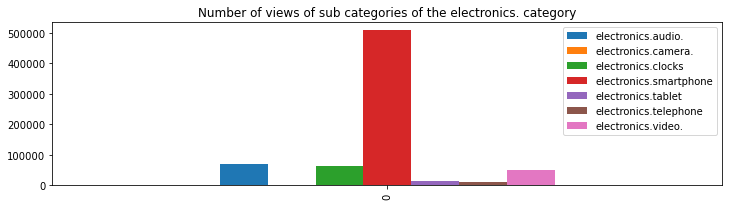

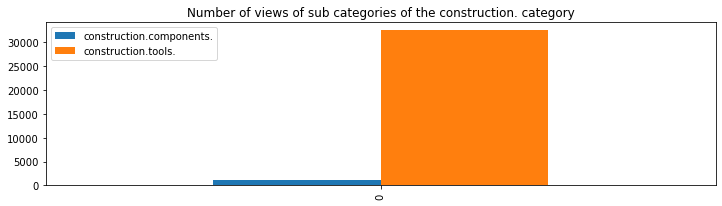

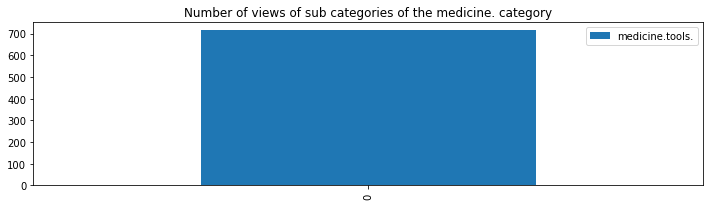

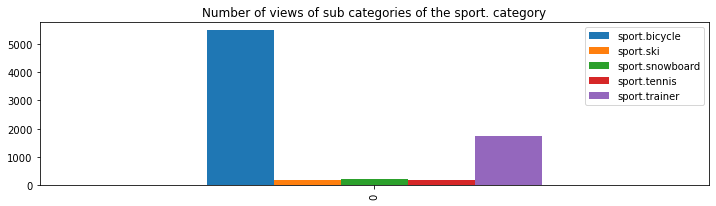

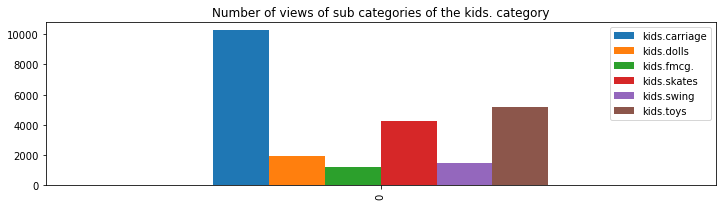

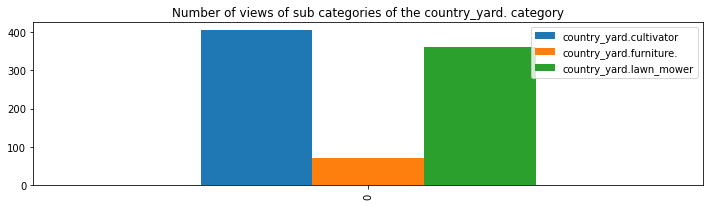

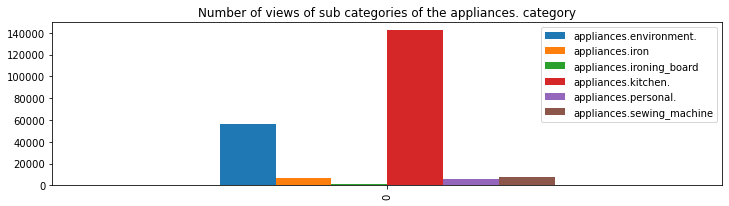

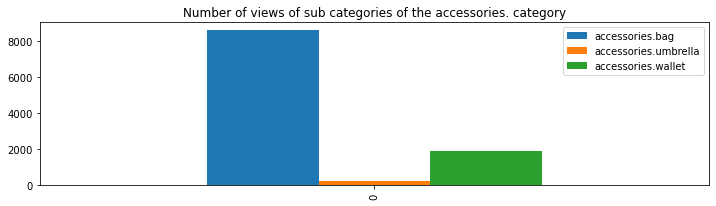

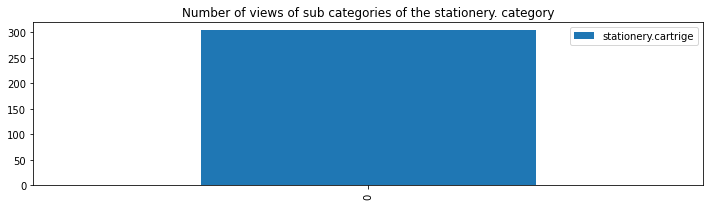

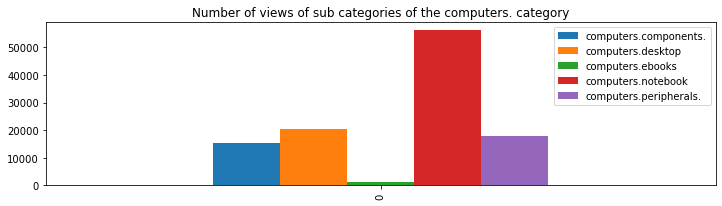

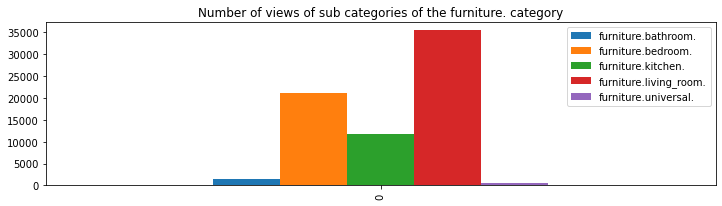

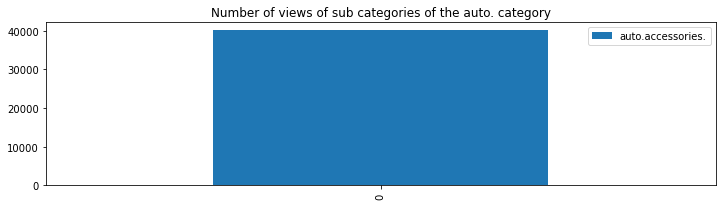

In [13]:
ds_group = ds[(ds.event_type=='view')].groupby(ds.category_code)
functions.RQ2_2(ds_group)

## What are the 10 most sold products per category?

Considering category what we are refearing to as **primary category**, we decided to find the product_id of the 10 most sold products beacuse it was the only unique type of information that we had about the single products.

In [14]:
ds_group = ds[(ds.event_type=='purchase')].groupby([ds.category_code, ds.product_id])
functions.RQ2_3(ds_group)

The 10 most sold products of the apparel category are  28720832 28720633 28718770 28717081 28716983 28715839 56300001 54900000 44000001.
The 10 most sold products of the electronics category are  1004856 1004767 1005115 1004833 1002544 4804056 1004870 1004249 1005105.
The 10 most sold products of the construction category are  19200005 4000169 19200010 12400121 19200039 12300396 4000170 30000048 12300490.
The 10 most sold products of the medicine category are  25800007 25800005 25800003 25800032.
The 10 most sold products of the sport category are  12201562 27000036 27000006 26900008 12201456 27000030 27000010 27000003 27000002.
The 10 most sold products of the kids category are  7004492 7002254 7004508 12100784 12100513 9002788 8902633 16200286 12100230.
The 10 most sold products of the country_yard category are  30500000 27600395 27600321 27600165 27600080.
The 10 most sold products of the appliances category are  3600661 3700926 3600163 3601485 3600666 3701134 2702277 2900536 390000

#### MAYBE not everything in bold, but just the introduction of the sentence or just the ID's

# **[RQ3]** For each category, what’s the brand whose prices are higher on average?

## Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

To get the output of this answer it is necessarily to write the exact category name otherwise the function will raise an error. So if it is needed to apply the function to the appliances category, it is asked to write exactly "appliances" (we can find it in the datafram) and not to change the case of any letter.

In [15]:
#For the same reasons as previous question, we only select 'purchase', but this time we add 'price' in the groupby because we need it to answear the question
test=ds[ds.event_type=='purchase'].groupby([ds.category_code,ds.brand,ds.price])

Here are some examples:

Insert a category: 
appliances


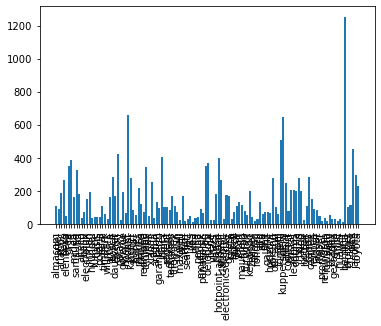

The brand whose prices are higher on average in the appliances category is bernina.


In [16]:
# maybe the plot it's too small should be wider try example 'appliances'
functions.RQ3_1(test)

## Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


To be more complete as possible we decided not to show only the results for each category, but to show also the average price of all the brands in a defined category. 

In [17]:
y=ds[ds.event_type=='purchase'].groupby([ds.category_code,ds.brand,ds.price])
_=functions.print_RQ3_2(y)

The brand whose prices are higher on average in the apparel. category is burton with an average product price around 311.
Then it comes goodloot with an average of 13euros.
Then it comes milavitsa with an average of 21euros.
Then it comes bond with an average of 23euros.
Then it comes noppies with an average of 23euros.
Then it comes dion with an average of 30euros.
Then it comes ersport with an average of 36euros.
Then it comes conceptclub with an average of 39euros.
Then it comes didistyle with an average of 39euros.
Then it comes sly with an average of 40euros.
Then it comes genau with an average of 40euros.
Then it comes crosby with an average of 42euros.
Then it comes harley-davidson with an average of 46euros.
Then it comes strobbs with an average of 51euros.
Then it comes shagovita with an average of 51euros.
Then it comes asics with an average of 51euros.
Then it comes rooman with an average of 52euros.
Then it comes escan with an average of 53euros.
Then it comes fassen with a

The brand whose prices are higher on average in the construction. category is zubr with an average product price around 927.
Then it comes eco with an average of 10euros.
Then it comes ansmann with an average of 18euros.
Then it comes puckator with an average of 21euros.
Then it comes fubag with an average of 25euros.
Then it comes resanta with an average of 25euros.
Then it comes decoroom with an average of 30euros.
Then it comes calorie with an average of 31euros.
Then it comes ivt with an average of 36euros.
Then it comes alteco with an average of 41euros.
Then it comes rossinka with an average of 41euros.
Then it comes edon with an average of 45euros.
Then it comes total with an average of 48euros.
Then it comes oasis with an average of 51euros.
Then it comes gran-stone with an average of 52euros.
Then it comes crown with an average of 55euros.
Then it comes vitek with an average of 57euros.
Then it comes eurolux with an average of 71euros.
Then it comes stels with an average of 73

The brand whose prices are higher on average in the accessories. category is coccinelle with an average product price around 266.
Then it comes deluxe with an average of 7euros.
Then it comes portcase with an average of 7euros.
Then it comes sumdex with an average of 7euros.
Then it comes ritmix with an average of 10euros.
Then it comes lenovo with an average of 11euros.
Then it comes stayer with an average of 26euros.
Then it comes xiaomi with an average of 27euros.
Then it comes continent with an average of 28euros.
Then it comes hp with an average of 33euros.
Then it comes stanley with an average of 40euros.
Then it comes baden with an average of 43euros.
Then it comes respect with an average of 57euros.
Then it comes karya with an average of 66euros.
Then it comes petek with an average of 78euros.
Then it comes picard with an average of 80euros.
The brand whose prices are higher on average in the stationery. category is hp with an average product price around 11.
Then it comes epso

##### to be completed

# **[RQ4]** How much does each brand earn per month?

## Write a function that given the name of a brand in input returns, for each month, its profit.

The input again needs to be exactly the brand we find in the dataframe, otherwise an error will be raised.

In [18]:
months = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

The to this question is in the functions' folder under the name of 'RQ4_1'.

Let us see some examples to see how the function works:

In [19]:
functions.RQ4_1 ('apple',ds)

[['October', 2717407], ['November', 2686414]]

In [20]:
functions.RQ4_1('nokia',ds)

[['October', 2436], ['November', 4674]]

In [21]:
functions.RQ4_1 ('Nokia',ds)

Error: The category you inserted does not exist


## Is the average price of products of different brands significantly different?

### WTF - need to do this

## Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing both the loss percentage and the 2 months.

Firstly, we need to define the loss percentage (supposing there was a loss -> (Old_month_profit - New_month_profit) > 0) as:
    
    [ (Old_month_profit - New_month_profit) / Old_month_profit ] * 100 

In [22]:
_=functions.RQ4_2(ds)

zeppelin lost 97% between October and November
denn lost 97% between October and November
hotpoint-ariston lost 94% between October and November


Comment on the result even if it is kind of straightforward

# **[RQ5]** In what part of the day is your store most visited?

Knowing which days of the week or even which hours of the day shoppers are more likely to visit the online store and make a purchase may help improve the store's strategies. 

##  Create a plot that for each day of the week show the hourly average of visitors your store has.

Our interpretation of this question is that we want to create single plot for each single day. Each plot will have on the x-axis the hours of a day, while on the y-axis we will find the hourly average of visitors.

We have defined the visitors as users that view at least one product in our store. So to be clear we do not count as multiple separate visitors a single user that does multiple views at different times.

In [23]:
y = ds[ds.event_type == 'view'].groupby([ds.event_time.dt.dayofweek, ds.event_time.dt.hour]).user_id.nunique()

In [24]:
group_days = ds[ds.event_type=='view'].groupby([ds.event_time.dt.dayofweek, ds.event_time.dt.day]).event_time.nunique()\
.groupby(level = 0).size()

NUMBER_DAYS = {}

NUMBER_DAYS = group_days.to_dict(NUMBER_DAYS)

# We create a dictionary with all the series we need 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ds_dict = dict.fromkeys(days)

for i in range(0,7): 
    try : 
        ds_dict[days[i]] = y[i].apply(lambda x : x / NUMBER_DAYS [i]) 
    
    except KeyError : 
        continue 

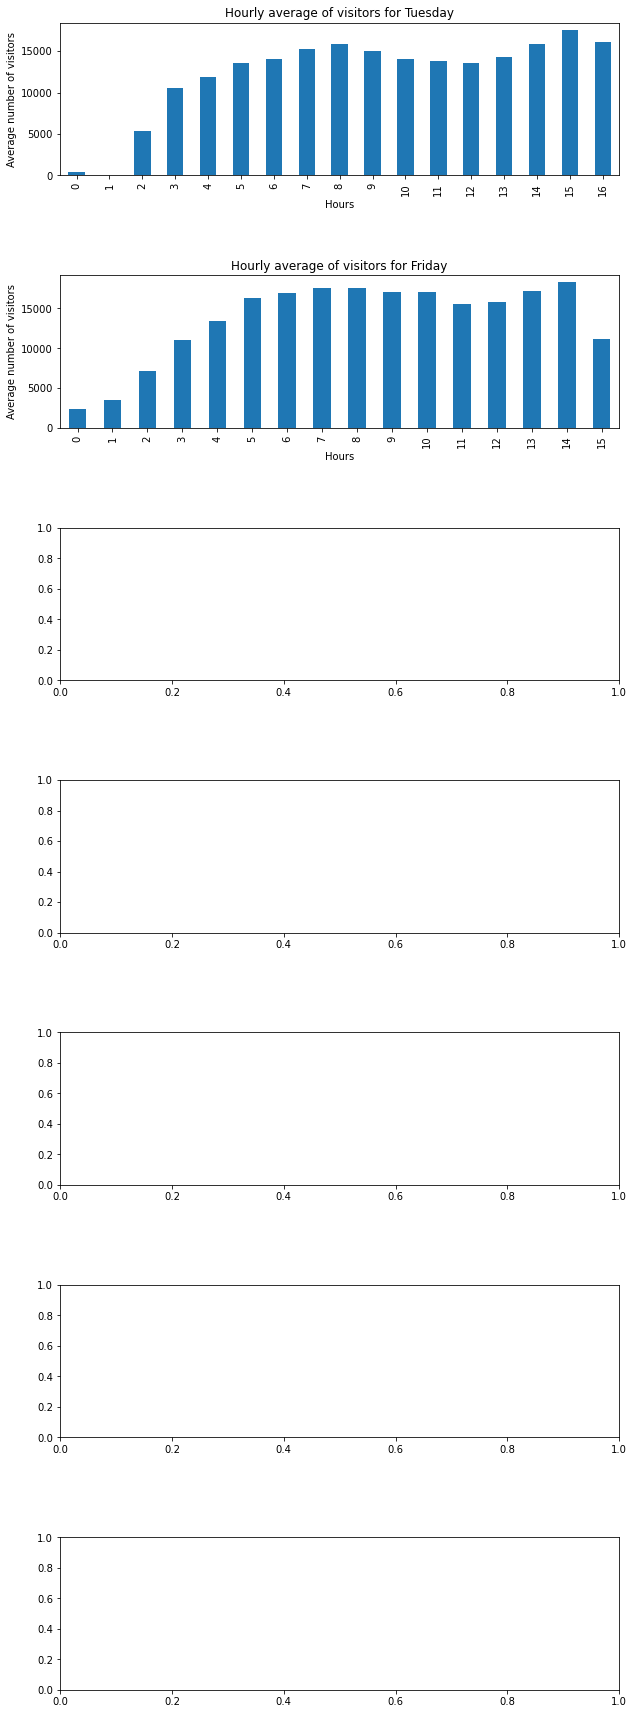

In [38]:
length = [ if ds_dict[key] != None x+=1 ]

fig, axes = plt.subplots(nrows=length, ncols=1)

i = 0
for key in ds_dict:
    try :
        title = 'Hourly average of visitors for ' +  key
        plot = ds_dict[key].plot.bar(ax=axes[i], figsize = (10, 25))
        plot.set_title(title)
        plot.set_xlabel('Hours')
        plot.set_ylabel ('Average number of visitors')
        i = i + 1 
    
    except AttributeError: 
        continue
        
        

fig.tight_layout(pad = 5.0)

# *[RQ6]* The conversion rate of a product is given by the purchase rate over the number of times the product has been visited.
# What's the conversion rate of your online store?

To answer this we will define the conversion rate of our online store as:

        ( X / Y )*100 
        
Where we have that X is the number of sales, while Y is the number of visitors.

In [26]:
# We just count the quantities in the formula above
X = ds[ds.event_type == 'purchase'].event_type.count() 
Y = ds[ds.event_type == 'view'].event_type.count()
CONV_RATE = ( X / Y )*100 

print("%.2f"%CONV_RATE)

1.79


Having a conversion rate greater than 1 means that the number of sales exceeds the number of visitors and this is an extremely relevant information for the store.

If the conversion rate would be ≤ than 1, we might want to define new strategies to boost our sales.

## Plot the number of purchases of each category. 

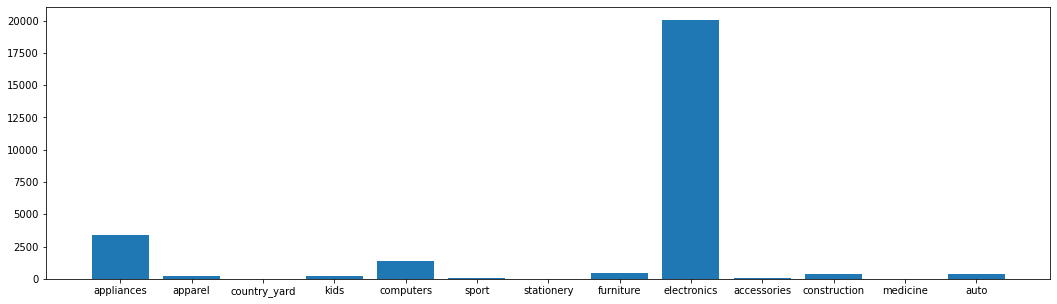

In [27]:
ds_group = ds[ds.event_type == 'purchase'].groupby(ds.category_code).event_type.count()
Q,D=functions.RQ6_2a(ds_group,ds)

plt.subplots(figsize=(18,5))
plt.bar(*zip(*Q.items()))
plt.show()

As we have already seen the category with the highest number of purchases is *electronics*, which is consistently greater than the number of purchases we can find in all other categories we can find in the store.

## Show the conversion rate of each category in decreasing order.

In [28]:
ds_group = ds[ds.event_type == 'purchase'].groupby(ds.category_code).event_type.count()

_=functions.RQ6_2b(ds_group,ds)

electronics        2.776545974590364
medicine        2.2346368715083798
stationery        1.9736842105263157
appliances        1.5330236589428636
computers        1.2231175526832874
kids        1.0710328696294473
construction        1.034052415760385
auto        0.8998563254606409
accessories        0.6892055508987612
country_yard        0.6535947712418301
furniture        0.6287437869068354
sport        0.5115443107977325
apparel        0.37846868023831703


It is interesting to see how the conversion rate of **stationery** is even greater than the one of *electronics*.
This result might be due to the fact that if one visitors does any type of event in the category *stationery* it will most probably lead to a purchase.

# [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes.

Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

## Prove that the pareto principle applies to your store.

We decided to specifically prove the Pareto principle by seeing if the 80% of our profit comes from what we defined as **"significant purchasers"**. The "significant purchasers" are the 20% from all the user_ids' that perform a purchase in our store and that spend the most money.

For this we are going to work on a sub-dataset that considers only the users that actually purchase any type of product in our store.

In [29]:
functions.Pareto_purchases(ds)

The Pareto principle does NOT apply to our store
